In [1]:
# 파이썬을 활용한 영어 텍스트 분석
# nltk 패키지 사용

import nltk


from nltk.corpus import brown
brown.words()

# 불용어 제거를 위한 불용어 사전 로딩
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
# 분석할 파일을 불러움
data1 = '''i love apple, apple, apple and orange, orange and banana,
            i dont't love peach'''
data1
print(1)

1


In [8]:
# 토큰화 하기 - 단어별로 짤라내기
data2 = nltk.word_tokenize(data1)
print(data2)

# word_tokenize 함수는 축약형을 제대로 분리할 수 없음
# 그래서 아래의 방법을 추천
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
new_data2 = tokenizer.tokenize(data1)
print(new_data2)

# 축약형의 경우 축약된 단어를 분리하지 말고 출력하고 싶을 경우 정규식을 사용하면 됨
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer('[\w]+')
new_data3 = tokenizer.tokenize(data1)
print(new_data3)

# 추촐된 단어별 상세 품사를 알고싶다면 아래의 방법을 활용
data3 = nltk.pos_tag(data2)
data3

['i', 'love', 'apple', ',', 'apple', ',', 'apple', 'and', 'orange', ',', 'orange', 'and', 'banana', ',', 'i', "dont't", 'love', 'peach']
['i', 'love', 'apple', ',', 'apple', ',', 'apple', 'and', 'orange', ',', 'orange', 'and', 'banana', ',', 'i', 'dont', "'", 't', 'love', 'peach']
['i', 'love', 'apple', 'apple', 'apple', 'and', 'orange', 'orange', 'and', 'banana', 'i', 'dont', 't', 'love', 'peach']


[('i', 'JJ'),
 ('love', 'VBP'),
 ('apple', 'NN'),
 (',', ','),
 ('apple', 'NN'),
 (',', ','),
 ('apple', 'NN'),
 ('and', 'CC'),
 ('orange', 'NN'),
 (',', ','),
 ('orange', 'NN'),
 ('and', 'CC'),
 ('banana', 'NN'),
 (',', ','),
 ('i', 'JJ'),
 ("dont't", 'VBP'),
 ('love', 'VB'),
 ('peach', 'NN')]

In [9]:
# 불용어 제거하기
data4 = [each_word for each_word in new_data3
        if each_word not in stopwords.words()]
data4

['love',
 'apple',
 'apple',
 'apple',
 'orange',
 'orange',
 'banana',
 'dont',
 'love',
 'peach']

In [11]:
# 단어별로 언급빈도 집계하기
from collections import Counter
data5 = Counter(data4)
print(data5)
data6 = data5.most_common(100)
print(data6)
data7 = dict(data6)
print(data7)

Counter({'apple': 3, 'love': 2, 'orange': 2, 'banana': 1, 'dont': 1, 'peach': 1})
[('apple', 3), ('love', 2), ('orange', 2), ('banana', 1), ('dont', 1), ('peach', 1)]
{'apple': 3, 'love': 2, 'orange': 2, 'banana': 1, 'dont': 1, 'peach': 1}


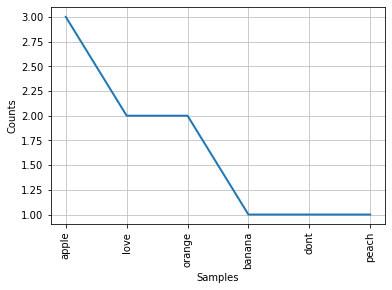

In [12]:
# 집계된 단어를 그래프로 표시
g_data4 = nltk.Text(data4, name = '다빈도 단어 그래프 출력하기')
g_data4.plot(10)

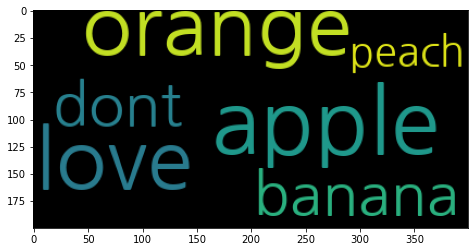

In [14]:
# 워드 클라우드 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path = 'NanumGothic.TTF',
                     relative_scaling = 0.2,
                     background_color = 'black'
                     ).generate_from_frequencies(data7)
plt.figure(figsize = (10, 4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

In [23]:
# 스탠포드 대학교 졸업식에서 연설한 프티브 잡스의 연설문 분석
# 파일 불러와서 형태소 분석
data1 = open('steve.txt').read()

# word_tokenize 함수는 축약형을 제대로 분리할 수 ㅇ벗음
# 그래서 아래의 방법을 추천
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
new_data2 = tokenizer.tokenize(data1)
print(new_data2)

#축약형의 경우 축약된 단어를 분리하지 말고 출력하고 싶을 경우 정규식을 사용하면 됨
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
new_data3 = tokenizer.tokenize(data1)
print(new_data3)

["'", 'You', "'", 've', 'got', 'to', 'find', 'what', 'you', 'love', ",'", 'Jobs', 'says', 'This', 'is', 'the', 'text', 'of', 'the', 'Commencement', 'address', 'by', 'Steve', 'Jobs', ',', 'CEO', 'of', 'Apple', 'Computer', 'and', 'of', 'Pixar', 'Animation', 'Studios', ',', 'delivered', 'on', 'June', '12', ',', '2005', '.', 'I', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', '.', 'I', 'never', 'graduated', 'from', 'college', '.', 'Truth', 'be', 'told', ',', 'this', 'is', 'the', 'closest', 'I', "'", 've', 'ever', 'gotten', 'to', 'a', 'college', 'graduation', '.', 'Today', 'I', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', '.', 'That', "'", 's', 'it', '.', 'No', 'big', 'deal', '.', 'Just', 'three', 'stories', '.', 'The', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', '.', 'I', 'dropped', 'out', 'of', 'Reed', 'College', 'after', 'the', 'first

In [24]:
# 불용어 제거하기
data4 = [each_word for each_word in new_data3
        if each_word not in stopwords.words()]
data4

["'You've",
 'got',
 'find',
 'love',
 "'",
 'Jobs',
 'says',
 'This',
 'text',
 'Commencement',
 'address',
 'Steve',
 'Jobs',
 'CEO',
 'Apple',
 'Computer',
 'Pixar',
 'Animation',
 'Studios',
 'delivered',
 'June',
 '12',
 '2005',
 'I',
 'honored',
 'today',
 'commencement',
 'finest',
 'universities',
 'world',
 'I',
 'never',
 'graduated',
 'college',
 'Truth',
 'told',
 'closest',
 "I've",
 'ever',
 'gotten',
 'college',
 'graduation',
 'Today',
 'I',
 'tell',
 'three',
 'stories',
 'life',
 "That's",
 'No',
 'big',
 'deal',
 'Just',
 'three',
 'stories',
 'The',
 'first',
 'story',
 'connecting',
 'dots',
 'I',
 'dropped',
 'Reed',
 'College',
 'first',
 '6',
 'months',
 'stayed',
 'around',
 'drop',
 'another',
 '18',
 'months',
 'I',
 'really',
 'quit',
 'So',
 'I',
 'drop',
 'It',
 'started',
 'I',
 'born',
 'My',
 'biological',
 'mother',
 'young',
 'unwed',
 'college',
 'graduate',
 'student',
 'decided',
 'put',
 'adoption',
 'She',
 'felt',
 'strongly',
 'I',
 'adopted',


In [25]:
# 단어별로 언급빈도 집계
from collections import Counter
data5 = Counter(data4)
data6 = data5.most_common(100)
print(data6)
data7 = dict(data6)

[('I', 86), ('And', 18), ('It', 17), ('life', 15), ('college', 12), ('Apple', 9), ('would', 9), ('years', 9), ('never', 8), ('The', 7), ('dropped', 7), ('months', 7), ('looking', 7), ('love', 6), ('first', 6), ('So', 6), ('later', 6), ('great', 6), ('know', 6), ('Stay', 6), ('got', 5), ('find', 5), ('ever', 5), ('started', 5), ('My', 5), ('decided', 5), ('everything', 5), ('But', 5), ('work', 5), ('best', 5), ('every', 5), ('get', 5), ('way', 5), ('If', 5), ('something', 5), ('company', 5), ("Don't", 5), ('death', 5), ('This', 4), ('No', 4), ('dots', 4), ('put', 4), ('parents', 4), ('course', 4), ('found', 4), ('go', 4), ('going', 4), ('made', 4), ('loved', 4), ('turned', 4), ('computer', 4), ('connect', 4), ('fired', 4), ('heart', 4), ('Pixar', 3), ('today', 3), ('graduated', 3), ('told', 3), ('closest', 3), ("I've", 3), ('tell', 3), ('three', 3), ('story', 3), ('drop', 3), ('really', 3), ('mother', 3), ('She', 3), ('wife', 3), ('last', 3), ('We', 3), ('final', 3), ('someday', 3), ('a

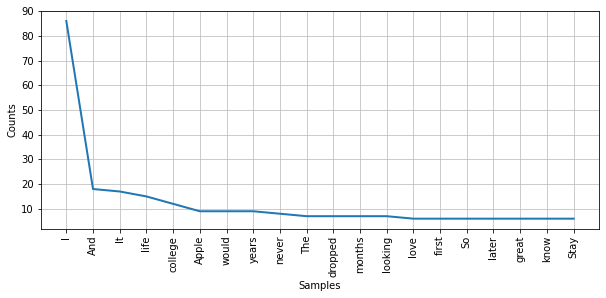

In [27]:
# 집계된 단어를 그래프로 표시하기
plt.figure(figsize = (10, 4))
g_data4 = nltk.Text(data4, name = '다빈도 단어 그래프 출력하기')
g_data4.plot(20)

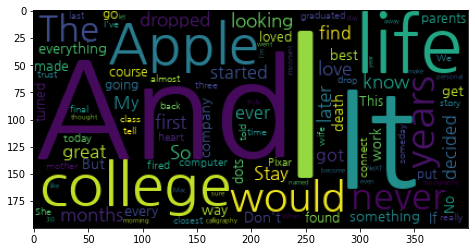

In [29]:
# 워드 클라우드 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path = 'NanumGothic.TTF',
                     relative_scaling = 0.2,
                     background_color = 'black',
                     ).generate_from_frequencies(data7)
plt.figure(figsize = (10, 4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

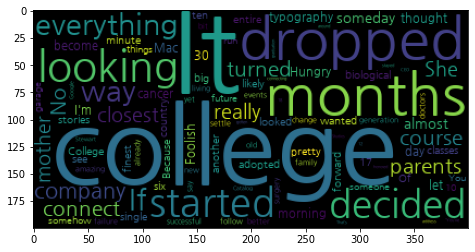

In [33]:
# 추가로 불용어 제거한 후 워드 클라우드 그리기
stop_words = open('eng_stop_word.txt').read()
new_data4 = [each_word for each_word in data4
            if each_word not in stop_words]

new_data4
#1글자 이하이거나 10글자 이상인 단어 삭제하기
new_data5 = []
for i in range(0, len(new_data4)):
    if len(new_data4[i]) >= 2 | len(new_data4[i]) <= 10:
        new_data5.append(new_data4[i])

data5 = Counter(new_data5)
data6 = data5.most_common(100)
data7 = dict(data6)

wordcloud = WordCloud(font_path = 'NanumGothic.TTF',
                     relative_scaling = 0.2,
                     background_color = 'black',
                     ).generate_from_frequencies(data7)
plt.figure(figsize = (10, 4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

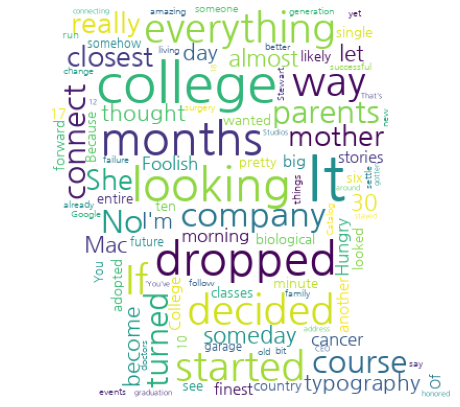

In [35]:
# 스티브 잡스 얼굴 사진 가져와서 워드클라우드 그리기

import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
steve_mask = np.array(Image.open('steve.jpg'))
wc = WordCloud(font_path = 'NanumGothic.TTF',
                     relative_scaling = 0.4, mask = steve_mask,
                     background_color = 'white',
                     min_font_size = 1,
                     max_font_size = 60,
                     max_words = 2000,
                     ).generate_from_frequencies(data7)
plt.figure(figsize = (8, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()

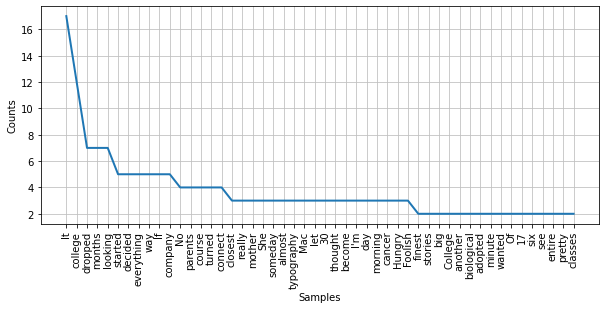

In [36]:
plt.figure(figsize = (10,4))
g_data5 = nltk.Text(new_data5, name = '다빈도 단어 그래프 출력하기')
g_data5.plot(50)